## 4-5. 워드클라우드 만들기 - 해시코드 질문 키워드

- bs4와 wordcloud를 이용해서 질문 키워드를 보여주는 시각화를 진행해봅시다.

### Target: 해시코드 질문 제목의 키워드

지난 실습에서 해시코드(https://hashcode.co.kr) 질문태그를 활용해 Bar Plot을 그렸다면,   
이번 실습에서는 질문 제목을 스크래핑한 후, 형태소 분석을 진행해서 워드클라우드를 그려봅시다.

In [1]:
# 다음 User-Agent를 추가해봅시다.

user_agent = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36"}

In [7]:
# Pagination이 되어있는 질문 리스트의 제목을 모두 가져와 리스트 questions에 저장해봅시다.
# https://hashcode.co.kr/?page={i}
# 과도한 요청을 방지하기 위해 0.5초마다 요청을 보내봅시다.

import time
import requests
from bs4 import BeautifulSoup

questions = []

for i in range(1,6):
    res = requests.get("https://hashcode.co.kr/?page={}".format(i),user_agent)
    soup = BeautifulSoup(res.text, "html.parser")

    parsed_datas = soup.find_all("li", "question-list-item")
    
    for data in parsed_datas:
        questions.append(data.h4.text.strip())
    time.sleep(0.5)


In [8]:
questions[:10]

['코틀린으로 csv 파일을 읽으려고 하는데, 글자가 깨짐니다.',
 '(왕초보) None이 왜 뜨는 걸까요?',
 '파이썬을 이용해 리듬게임을 만들고 있는데 판정이 잘못되어 질문합니다',
 '뭐가 문제인지 모르겠어요....',
 '파이썬 이용하여 리스트 내용 엑셀에 옮겨쓰기',
 '셀레니움과 크롬드라이버 차이, 관계',
 '리스트 항목 하나씩 읽어 색깔 바꾸기',
 '파이썬에서 엑셀2의 내용을 엑셀1에 삽입하는 방법이 무엇이 있을까요?',
 '기존 list안에 새로운 리스트로  append 하기',
 'Xcode 한글 자소분리 질문. 안녕이라고 입력하면 ㅇㅏㄴㄴㅕㅇ 이런식으로 출력']

In [9]:
# 텍스트 구름을 그리기 위해 필요한 라이브러리를 불러와봅시다.

# 시각화에 쓰이는 라이브러리
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 횟수를 기반으로 딕셔너리 생성
from collections import Counter

# 문장에서 명사를 추출하는 형태소 분석 라이브러리
from konlpy.tag import Hannanum

In [11]:
# Hannanum 객체를 생성한 후, .nouns()를 통해 명사를 추출합니다.

word = []

hannanum = Hannanum()

for question in questions:
    nonus = hannanum.nouns(question)
    word += nonus
    
print(len(word))

1102


In [ ]:
# counter를 이용해 각 단어의 개수를 세줍니다.

counter = Counter(word)
counter

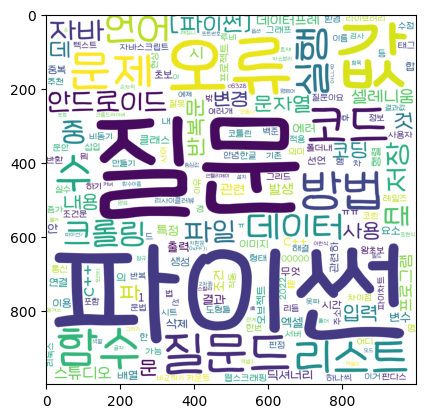

In [29]:
# WordCloud를 이용해 텍스트 구름을 만들어봅시다.

wordcloud = WordCloud(
    font_path="/Users/hamin/Desktop/KDT_AI-month1/LeeSeoyun.ttf",
    background_color="white",
    height=1000,
    width=1000,
)

img = wordcloud.generate_from_frequencies(counter)
plt.imshow(img)